In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
#import os

In [2]:
print("Hello, World!")

Hello, World!


In [3]:
b = [1, 2, 3]
b?

使用问号可以把函数的注释里的内容打印出来：

In [4]:
def add_numbers(a, b):
    """
    Add two numbers together
    
    Returns
    -------
    the_sum : type of arguments
    """
    return a + b

add_numbers?

使用??会显示函数的源码：

In [5]:
add_numbers??

?还有一个用途，就是像Unix或Windows命令行一样搜索IPython的命名空间。字符与通配符结合可以匹配所有的名字。例如，我们可以获得所有包含load的顶级NumPy命名空间：

In [6]:
np.*load*?

### 中断运行的代码
代码运行时按Ctrl-C，无论是%run或长时间运行命令，都会导致KeyboardInterrupt。这会导致几乎所有Python程序立即停止，除非一些特殊情况。

### 魔术命令
IPython中特殊的命令（Python中没有）被称作“魔术”命令。这些命令可以使普通任务更便捷，更容易控制IPython系统。魔术命令是在指令前添加百分号%前缀。例如，可以用%timeit（这个命令后面会详谈）测量任何Python语句，例如矩阵乘法，的执行时间：

In [7]:
a = np.random.randn(100, 100)

%timeit np.dot(a, a)

23.3 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


魔术命令可以被看做IPython中运行的命令行。许多魔术命令有“命令行”选项，可以通过？查看：

In [8]:
#%debug?     # This is doesn't work

魔术函数默认可以不用百分号，只要没有变量和函数名相同。这个特点被称为“自动魔术”，可以用%automagic打开或关闭。  
一些魔术函数与Python函数很像，它的结果可以赋值给一个变量：

In [9]:
timeit np.dot(a, a)

22.8 µs ± 732 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%pwd

'E:\\GitKraken_clones\\python_for_data_analysis_2nd_version_my_code'

In [11]:
foo = %pwd

foo

'E:\\GitKraken_clones\\python_for_data_analysis_2nd_version_my_code'

表2-2列出了一些可以提高生产率的交互计算和Python开发的IPython指令。

![jupyter](./magic_command.png)

### matplotlib

In [12]:
%matplotlib inline

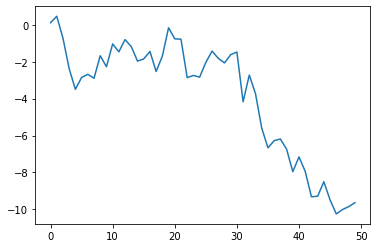

In [13]:
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
plt.plot(np.random.randn(50).cumsum())

### Python语法基础

### 使用缩进，而不是括号
Python使用空白字符（tab和空格）来组织代码，  
Python的语句不需要用分号结尾。但是，分号却可以用来给同在一行的语句切分。  
Python不建议将多条语句放到一行，这会降低代码的可读性。

### 万物皆对象
Python语言的一个重要特性就是它的对象模型的一致性。每个数字、字符串、数据结构、函数、类、模块等等，都是在Python解释器的自有“盒子”内，它被认为是Python对象。每个对象都有类型（例如，字符串或函数）和内部数据。在实际中，这可以让语言非常灵活，因为函数也可以被当做对象使用。

### 注释
任何前面带有井号#的文本都会被Python解释器忽略。这通常被用来添加注释。

### 函数和对象方法调用
你可以用圆括号调用函数，传递零个或几个参数，或者将返回值给一个变量：  

result = f(x, y, z)

几乎Python中的每个对象都有附加的函数，称作方法，可以用来访问对象的内容。可以用下面的语句调用：  

obj.some_method(x, y, z)

函数可以使用位置和关键词参数：  

result = f(a, b, c, d=5, e='foo')

### 变量和参数传递
当在Python中创建变量（或名字），你就在等号右边创建了一个对这个变量的引用。考虑一个整数列表：

a = [1, 2, 3]

假设将a赋值给一个新变量b：

b = a

在有些方法中，这个赋值会将数据[1, 2, 3]也复制。在Python中，a和b实际上是同一个对象，即原有列表[1, 2, 3]（见图2-7）。你可以在a中添加一个元素，然后检查b：

a.append(4)  
b  
[1, 2, 3, 4]  

当你将对象作为参数传递给函数时，新的局域变量创建了对原始对象的引用，而不是复制。如果在函数里绑定一个新对象到一个变量，这个变动不会反映到上一层。因此可以改变可变参数的内容。假设有以下函数：

### 动态引用，强类型
与许多编译语言（如JAVA和C++）对比，Python中的对象引用不包含附属的类型。下面的代码是没有问题的：

In [14]:
a = 5
type(a)

int

In [15]:
a = 'foo'
type(a)

str

变量是在特殊命名空间中的对象的名字，类型信息保存在对象自身中。一些人可能会说Python不是“类型化语言”。这是不正确的，看下面的例子：

In [16]:
'5'+ 5

TypeError: can only concatenate str (not "int") to str

在这个方面，Python被认为是强类型化语言，意味着每个对象都有明确的类型（或类），默许转换只会发生在特定的情况下，例如：

In [17]:
a = 4.5
b = 2

a/b

2.25

知道对象的类型很重要，最好能让函数可以处理多种类型的输入。你可以用isinstance函数检查对象是某个类型的实例：

In [21]:
a = 5
isinstance(a, int)

True

In [22]:
b = 4.5
isinstance(a, (int, float))

True

In [23]:
isinstance(b, (int, float))

True

### 鸭子类型
经常地，你可能不关心对象的类型，只关心对象是否有某些方法或用途。这通常被称为“鸭子类型”，来自“走起来像鸭子、叫起来像鸭子，那么它就是鸭子”的说法。例如，你可以通过验证一个对象是否遵循迭代协议，判断它是可迭代的。判断方法是使用iter函数：

In [25]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

In [26]:
isiterable('a string')

True

In [27]:
isiterable([1, 2, 3])

True

In [28]:
isiterable(5)

False

总是用这个功能编写可以接受多种输入类型的函数。常见的例子是编写一个函数可以接受任意类型的序列（list、tuple、ndarray）或是迭代器。你可先检验对象是否是列表（或是NUmPy数组），如果不是的话，将其转变成列表：

In [ ]:
if not isinstance(x, list) and isiterable(x):
    x = list(x)

### 引入
在Python中，模块就是一个有.py扩展名、包含Python代码的文件。

如果想从同目录下的另一个文件访问some_module.py中定义的变量和函数，可以：

import some_module

或者：

from some_module import f, g, PI

使用as关键词，你可以给引入起不同的变量名：

import some_module as sm  
from some_module import PI as pi, g as gf

### 二元运算符和比较运算符

![jupyter](Binary_operator.png)

### 可变与不可变对象
Python中的大多数对象，比如列表、字典、NumPy数组，和用户定义的类型（类），都是可变的。意味着这些对象或包含的值可以被修改.   
其它的，例如字符串和元组，是不可变的.

### 标量类型
Python的标准库中有一些内建的类型，用于处理数值数据、字符串、布尔值，和日期时间。这些单值类型被称为标量类型，本书中称其为标量。表2-4列出了主要的标量。日期和时间处理会另外讨论，因为它们是标准库的datetime模块提供的。

![jupyter](Scalar_type.png)

### 数值类型
Python的主要数值类型是int和float。int可以存储任意大的数。  
浮点数使用Python的float类型。每个数都是双精度（64位）的值。也可以用科学计数法表示.  
不能得到整数的除法会得到浮点数.  
要获得C-风格的整除（去掉小数部分），可以使用底除运算符//：

In [32]:
3 // 2

1

### 字符串
许多人是因为Python强大而灵活的字符串处理而使用Python的。你可以用单引号或双引号来写字符串。
对于有换行符的字符串，可以使用三引号，'''或"""都行：

In [33]:
c = """
This is a longer string that
spans multiple lines
"""

字符串c实际包含四行文本，"""后面和lines后面的换行符。可以用count方法计算c中的新的行：

In [34]:
c.count('\n')

3

Python的字符串是不可变的，不能修改字符串.

a = 'this is a string'  
a[10] = 'f'  

这样是报错的  
许多Python对象使用str函数可以被转化为字符串：

In [36]:
a = 5.6
s = str(a)
print(s)

5.6


反斜杠是转义字符，意思是它备用来表示特殊字符，比如换行符\n或Unicode字符。要写一个包含反斜杠的字符串，需要进行转义.

用+将两个字符串合并，会产生一个新的字符串。

### 字节和Unicode
在Python 3及以上版本中，Unicode是一级的字符串类型，这样可以更一致的处理ASCII和Non-ASCII文本。在老的Python版本中，字符串都是字节，不使用Unicode编码。假如知道字符编码，可以将其转化为Unicode。

In [37]:
val = "español"

val

'español'

In [38]:
val_utf8 = val.encode('utf-8')

val_utf8

b'espa\xc3\xb1ol'

In [39]:
type(val_utf8)

bytes

如果你知道一个字节对象的Unicode编码，用decode方法可以解码：

In [40]:
val_utf8.decode('utf-8')

'español'

工作中碰到的文件很多都是字节对象，盲目地将所有数据编码为Unicode是不可取的。

虽然用的不多，你可以在字节文本的前面加上一个b：

In [42]:
bytes_val = b'this is bytes'

bytes_val

b'this is bytes'

In [43]:
decoded = bytes_val.decode('utf8')

decoded

'this is bytes'

### 布尔值
Python中的布尔值有两个，True和False。比较和其它条件表达式可以用True和False判断。布尔值可以与and和or结合使用：

In [2]:
True and True

True

In [3]:
True or False

True

### 类型转换
str、bool、int和float也是函数，可以用来转换类型：

In [6]:
s = '3.1415926'
fval = float(s)
type(fval)

float

In [7]:
int(fval)

3

In [8]:
bool(fval)

True

### None
None是Python的空值类型。如果一个函数没有明确的返回值，就会默认返回None：

In [9]:
a = None
a is None

True

None也常常作为函数的默认参数：

In [11]:
def add_and_maybe_multiply(a, b, c=None):
    result = a + b

    if c is not None:
        result = result * c

    return result

In [12]:
type(None)

NoneType

### 日期和时间
Python内建的datetime模块提供了datetime、date和time类型。datetime类型结合了date和time，是最常使用的：

In [14]:
from datetime import datetime,date,time
dt = datetime(2020, 10, 29, 20, 30, 21)
dt.day

29

In [15]:
dt.minute

30

In [18]:
dt.date()

datetime.date(2020, 10, 29)

In [19]:
dt.time()

datetime.time(20, 30, 21)

strftime方法可以将datetime格式化为字符串：

In [20]:
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2020 20:30'

strptime可以将字符串转换成datetime对象：

In [21]:
datetime.strptime('20201031','%Y%m%d')

datetime.datetime(2020, 10, 31, 0, 0)

### 控制流
### if、elif和else
if是最广为人知的控制流语句。它检查一个条件，如果为True，就执行后面的语句：

In [24]:
if -1 < 0:
    print('It’s negative')

It’s negative


if后面可以跟一个或多个elif，所有条件都是False时，还可以添加一个else：

In [ ]:
if x < 0:
    print('It's negative')
elif x == 0:
    print('Equal to zero')
elif 0 < x < 5:
    print('Positive but smaller than 5')
else:
    print('Positive and larger than or equal to 5')

如果某个条件为True，后面的elif就不会被执行。当使用and和or时，复合条件语句是从左到右执行：

### for循环
for循环是在一个集合（列表或元组）中进行迭代，或者就是一个迭代器。for循环的标准语法是：

In [ ]:
for value in collection:
    # do something with value

你可以用continue使for循环提前，跳过剩下的部分。看下面这个例子，将一个列表中的整数相加，跳过None：

In [ ]:
sequence = [1, 2, None, 4, None, 5]
total = 0
for value in sequence:
    if value is None:
        continue
    total += value

可以用break跳出for循环。下面的代码将各元素相加，直到遇到5：

In [ ]:
sequence = [1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 = 0
for value in sequence:
    if value == 5:
        break
    total_until_5 += value

break只中断for循环的最内层，其余的for循环仍会运行：

In [30]:
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i,j))

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


### While循环
while循环指定了条件和代码，当条件为False或用break退出循环，代码才会退出：

In [31]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

### pass
pass是Python中的非操作语句。代码块不需要任何动作时可以使用（作为未执行代码的占位符）；因为Python需要使用空白字符划定代码块，所以需要pass：

In [ ]:
if x < 0:
    print('negative!')
elif x == 0:
    # TODO: put something smart here
    pass
else:
    print('positive!')